<h1>Desafío de visualización</h1>

In [1]:
#Importamos las librerias necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import src.graficas as gr

In [2]:
#Lo primero que tenemos que hacer es generar la conexión con nuestra BBDD
base = gr.inicio()

<h3>División más competitividad</h3>

<p>Lo primero que haremos será ver cuál puede ser la división con más competividad, para ello tendremos que tener en cuenta que lo que hace complicado un combate es lo difícil que sea conectar los golpes a tu contrincante.</p>
<p>Ahora pasaremos a ver una gráfica con el porcentaje de acierto medio de cada división excepto de "Open Weight" y "Super Heavyweight" las cuales son divisiones que ya no existen, estas fueron creadas cuando este deporte aún estaba en vias de desarrollo.</p>
<p>También se excluirá "Catch Weight", ya que hace referencia a los combates que han sido relizados fuera del peso autorizado para la división, devido a la imposibilidad de dar el peso de la categoría o querer hacer la pelea en un peso intermedio.</p>
<p><b>Gráficas</b></p>

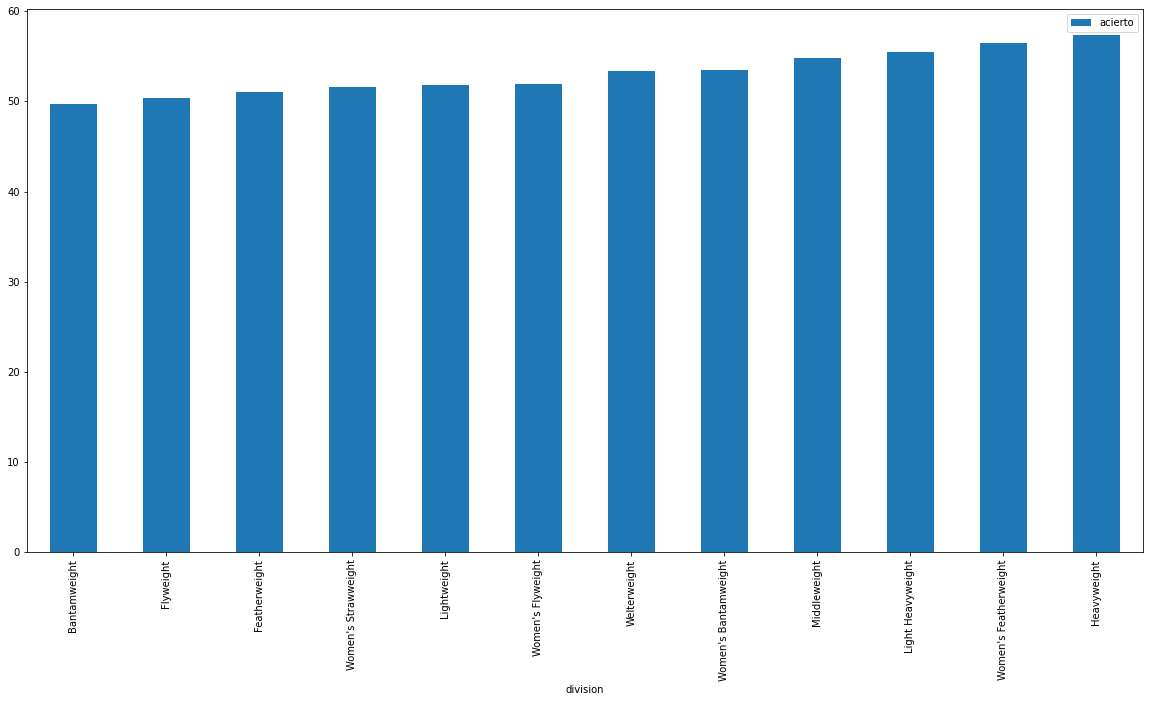

In [122]:
q_p = """
select distinct(division), round(sum(c_total_str)/sum(i_total_str)*100,2) as acierto
from division
natural join pertenece
natural join peleador
natural join se_pelean
where division != "Open Weight" and division != "Super Heavyweight" and division != "Catch Weight"
group by division
order by acierto; 
"""

df_pelota = pd.read_sql(q_p, base)

df_pelota = df_pelota.set_index("division")

df_pelota.plot.bar(figsize=(20, 10));



<p>Podemos ver que, en cuanto al striking, la división más competitiva es "Bantamweight", seguida por "Featherweight", 
"Flyweight" y "Women's Strawweight", otra gran parte de las MMA`s es el suelo (takedowns, clinch e intento de sumisiones); entonces también veremos cuál es la division más competitiva en cuanto al suelo.</p>

<p>En el control de suelo, las mejores son "Flyweight", "Featherweight",
"Lightweight" y "Bantamweight".</p>

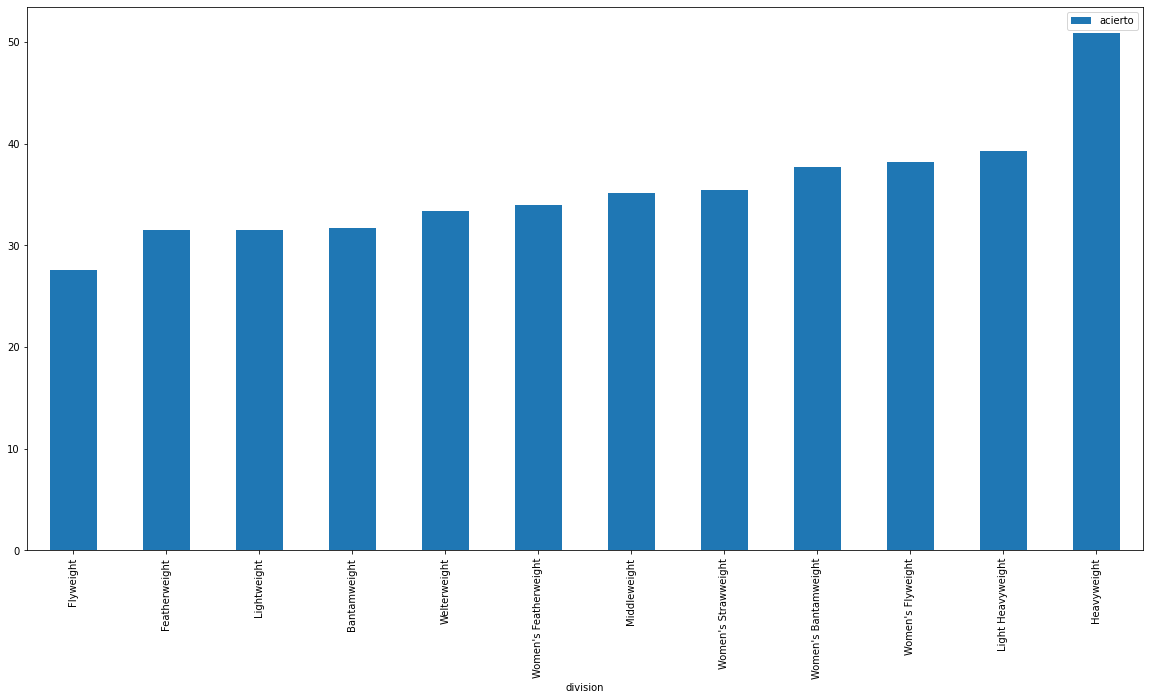

In [123]:
# los mayores indicadores son los "takedowns" y los "intento de sumisiones", en esta gráfica veremos los "takedowns"
q_p2 = """
select distinct(division), round(count(c_td)/sum(i_td)*100,2) as acierto
from division
natural join pertenece
natural join peleador
natural join se_pelean
where division != "Open Weight" and division != "Super Heavyweight" and division != "Catch Weight"
group by division
order by acierto; 
"""
df_pelota2 = pd.read_sql(q_p2, base)

df_pelota2 = df_pelota2.set_index("division")

df_pelota2.plot.bar(figsize=(20, 10));

<p>¡¡Vaya!! parece que tenemos un triple empate, ya que "Bantamweight", "Featherweight" y
"Flyweight" se han metido en el top 4 las dos veces.</p>
<p>Para desempatar haremos una visualización más, y el que tenga menos puntos seré la división afortunada en la que seguiremos nuestro análisis</p>

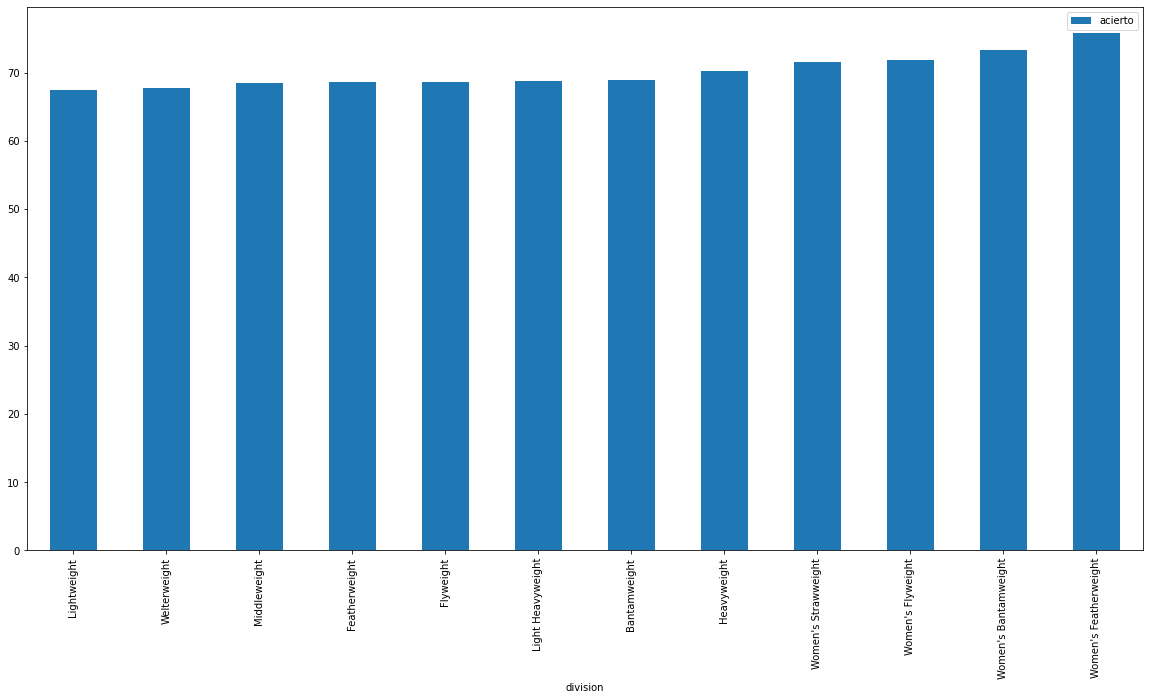

In [125]:
q_p3 = """
select distinct(division), round(sum(c_clinch)/sum(i_clinch)*100,2) as acierto
from division
natural join pertenece
natural join peleador
natural join se_pelean
where division != "Open Weight" and division != "Super Heavyweight" and division != "Catch Weight"
group by division
order by acierto; 
"""
df_pelota3 = pd.read_sql(q_p3, base)

df_pelota3 = df_pelota3.set_index("division")

df_pelota3.plot.bar(figsize=(20, 10));

<p>En la última gráfica, los top 4 son "Lightweight", "Welterweight", "Middleweight" y "Featherweight".</p>
<p>Y las posiciones han quedado así:</p>
<p>1º Featherweight</p>
<p>2º Lightweight</p>
<p>3º Flyweight</p>
<p>4º Bantamweight</p>


<h3>Efectividad de ataques en combates por finalización</h3>

<p>Sabiendo qué división es la más competitiva, pasaremos a comparar la efectividad de los ataques realizados en dicha división, para así saber cuál es más eficiente a la hora de finalizar una pelea.</p>

¿Qué categoria de peso quieres consultar?:
1. Bantamweight 
2. Catch Weight 
3. Featherweight 
4. Flyweight 
5. Heavyweight
6. Light Heavyweight 
7. Lightweight 
8. Middleweight 
9. Open Weight 
10. Super Heavyweight
11. Welterweight 
12. Women's Bantamweight 
13. Women's Featherweight 
14. Women's Flyweight
15. Women's Strawweight
None3
¿Qué metodo de victoria quieres consultar?:
 1. U-DEC
 2. S-DEC
 3. SUB
 4. KO/TKO

None3


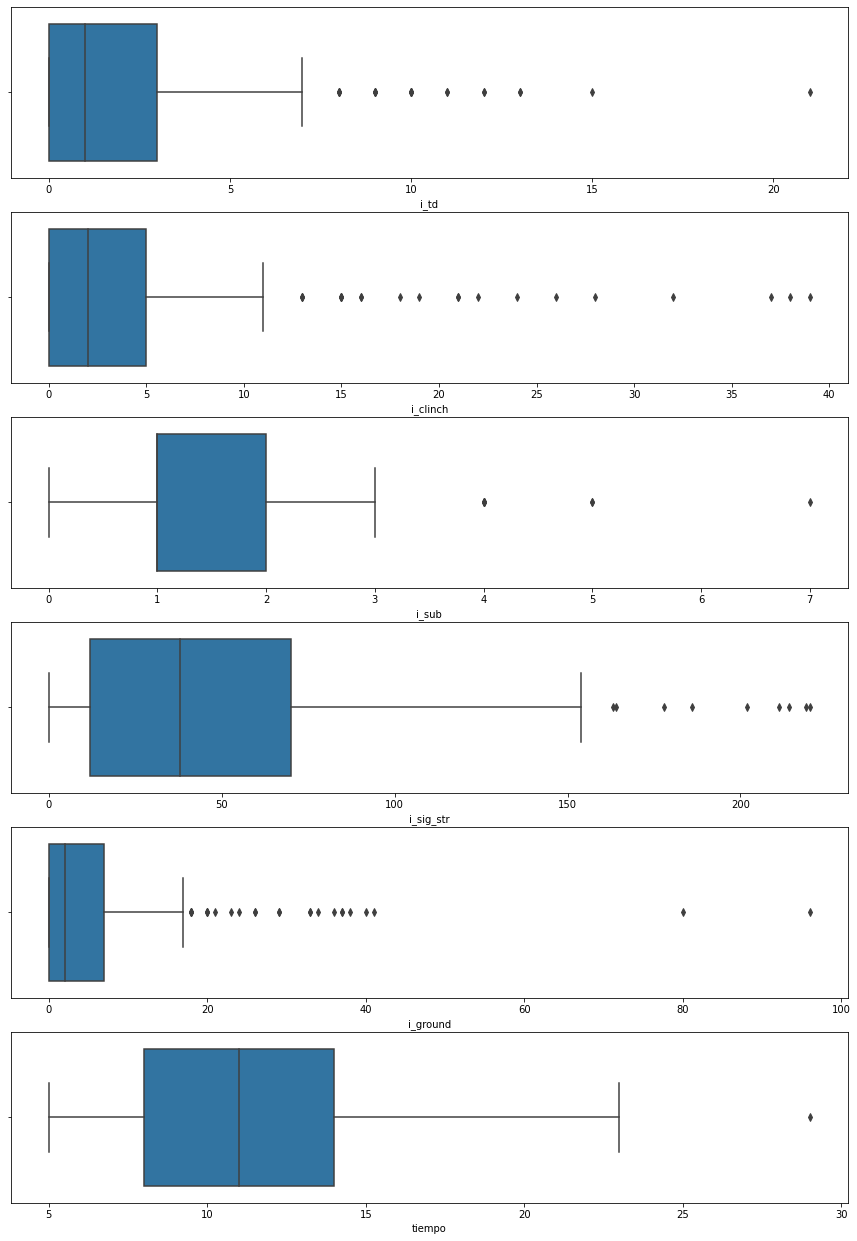

In [3]:
#Generamos una gráfica que nos muestra la cantidad de ataques realizados y su media por combate.
gr.amg(base)

<p>En la gráfica anteriormente mostrada que refiere a las estadísticas de las victorias por sumisión se puede observar que los takedowns, el clinch y sumisiones requieren menos intentos para conseguir la victoria, pero el tiempo parece ser moderadamente alto.</p>

¿Qué categoria de peso quieres consultar?:
1. Bantamweight 
2. Catch Weight 
3. Featherweight 
4. Flyweight 
5. Heavyweight
6. Light Heavyweight 
7. Lightweight 
8. Middleweight 
9. Open Weight 
10. Super Heavyweight
11. Welterweight 
12. Women's Bantamweight 
13. Women's Featherweight 
14. Women's Flyweight
15. Women's Strawweight
None3
¿Qué metodo de victoria quieres consultar?:
 1. U-DEC
 2. S-DEC
 3. SUB
 4. KO/TKO

None4


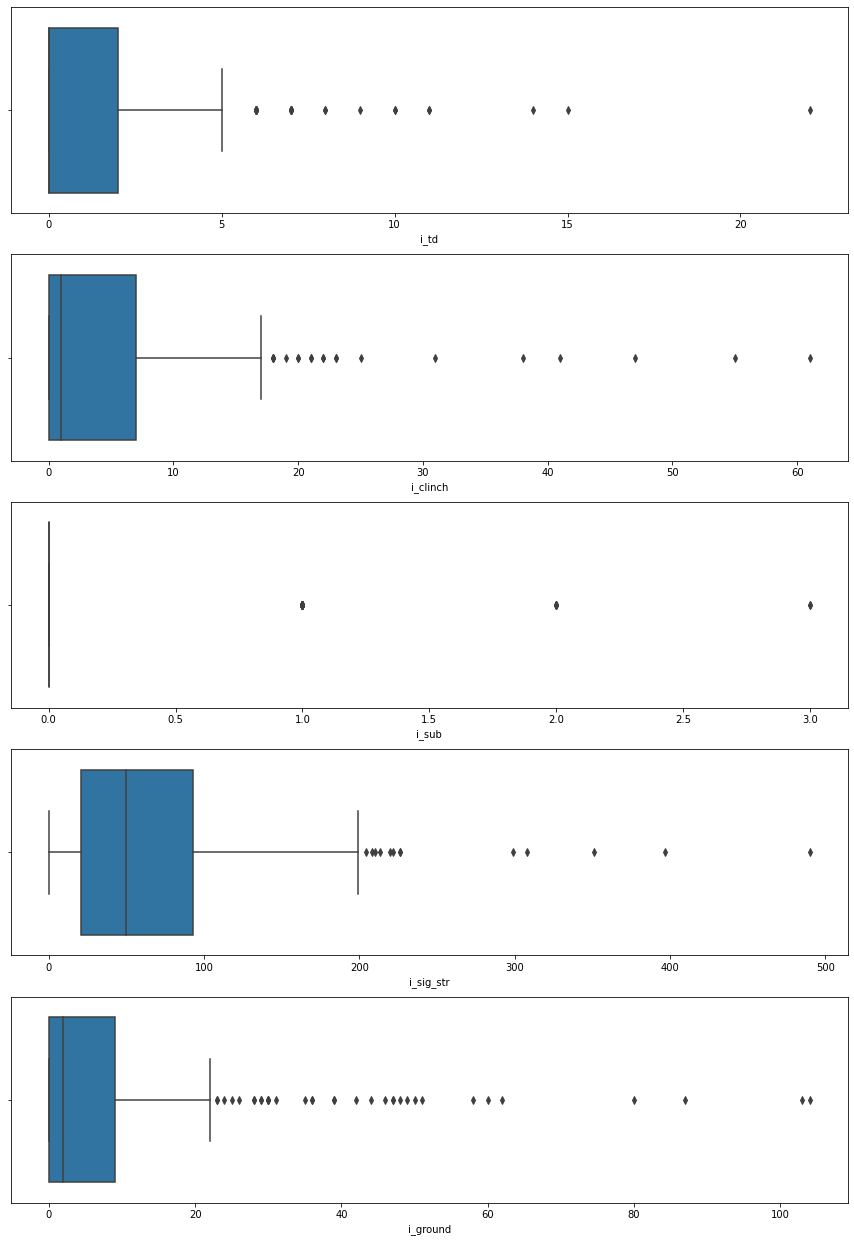

In [4]:
gr.amg(base)

<p>En las victorias por KO/TKO (KO o KO técnico) los i_sig_srt (golpes significativos) son algo elevados y el i_ground (ground and pound o golpes a ras de lona) son moderados, pero con una dispersión abundante de muchos golpes. Por último, el tiempo medio es moderado con bastante uniformidad entre los 5 y los 23 minutos con una media de 10 minutos.</p>

<p>La <b>conclusión</b> que puedo sacar de esto es que una victoria en la que no tienen que involucrarse los jueces, la manera más efectiva de ganar es utilizando el juego de piso.</p>
<p>He llegado a esta conclusión, ya que la diferencia entre los golpes significativos y golpes a ras de lona de las victorias por sumisión no distan tanto de los de las victorias por KO/TKO. Además de que los intentos de sumisión en las victorias por KO/TKO son menores que las de las victorias por sumisión, lo cual nos puede indicar que son más efectivas a la hora de finalizar las artes marciales dedicadas a la pelea de suelo. La única desventaja es que el tiempo medio que transcurre es mayor al de las victorias por KO/TKO, lo que podría acarrear más cansancio al peleador lo que podría perjudicarlo a largo plazo.</p>

<h3>Valoración de ataques en victoria por decisión</h3>

¿Qué categoria de peso quieres consultar?:
1. Bantamweight 
2. Catch Weight 
3. Featherweight 
4. Flyweight 
5. Heavyweight
6. Light Heavyweight 
7. Lightweight 
8. Middleweight 
9. Open Weight 
10. Super Heavyweight
11. Welterweight 
12. Women's Bantamweight 
13. Women's Featherweight 
14. Women's Flyweight
15. Women's Strawweight
None3
¿Qué metodo de victoria quieres consultar?:
 1. U-DEC
 2. S-DEC
 3. SUB
 4. KO/TKO

None1


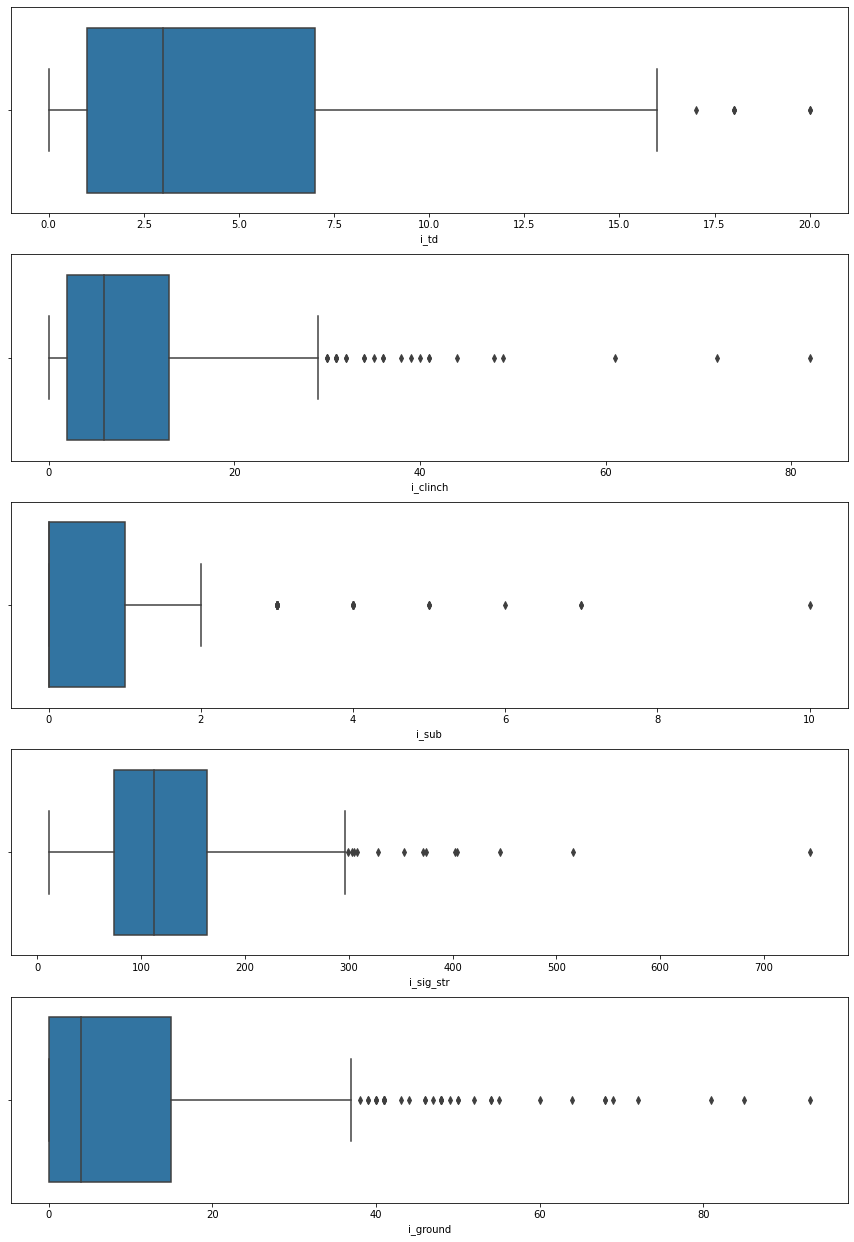

In [5]:
gr.amg(base)

<p>En las victorias unánimes se puede observar que han favorecido a los peleadores que más golpes significativos y takedowns han efectuado, por encima de otros ataques.</p>

¿Qué categoria de peso quieres consultar?:
1. Bantamweight 
2. Catch Weight 
3. Featherweight 
4. Flyweight 
5. Heavyweight
6. Light Heavyweight 
7. Lightweight 
8. Middleweight 
9. Open Weight 
10. Super Heavyweight
11. Welterweight 
12. Women's Bantamweight 
13. Women's Featherweight 
14. Women's Flyweight
15. Women's Strawweight
None3
¿Qué metodo de victoria quieres consultar?:
 1. U-DEC
 2. S-DEC
 3. SUB
 4. KO/TKO

None2


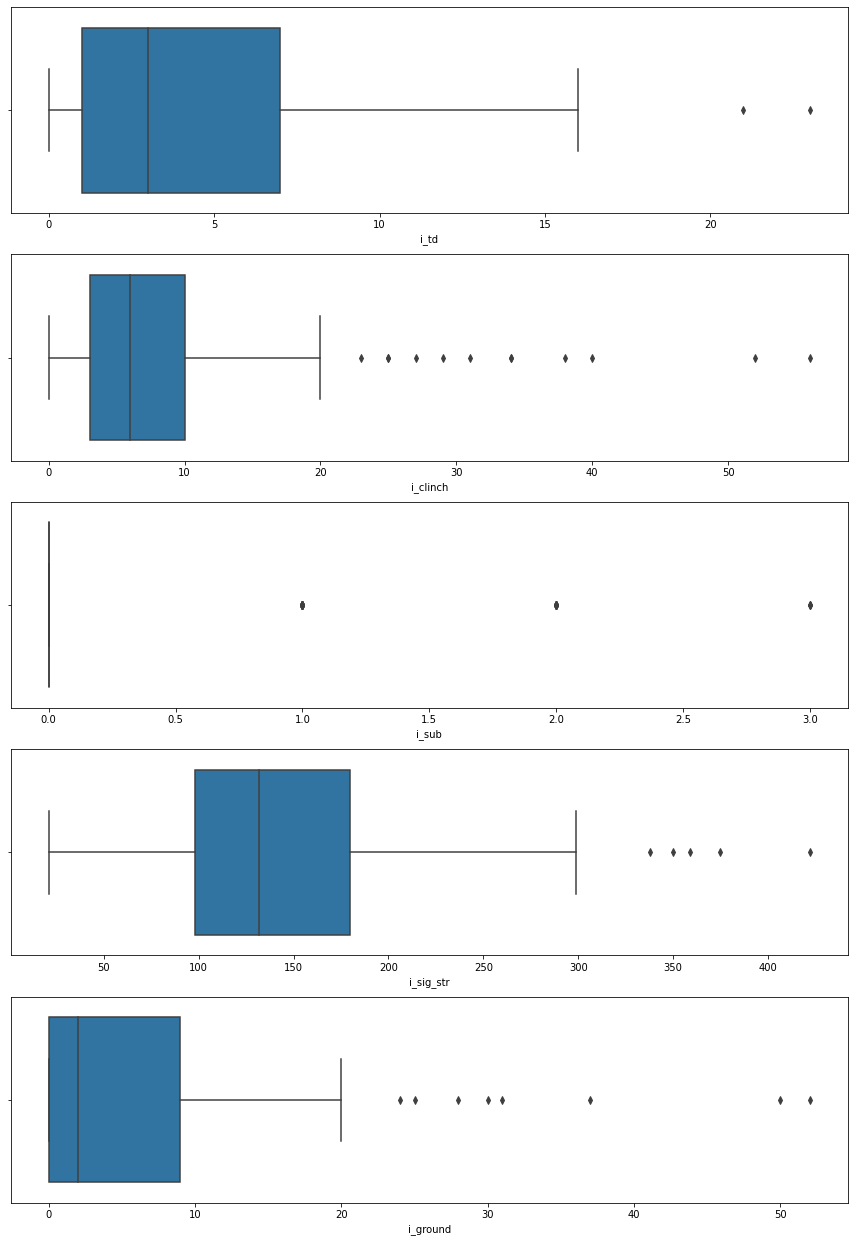

In [6]:
gr.amg(base)

<p>Las victorias por decisión dividida son anómalas, así que no hay muchos datos para cotejar. Sin embargo, los que tenemos parecen indicar que se tomaron en cunta los mismos ataques que en las batallas por decisión unánime.</p>

<p>Los resultados que nos proporcionan las gráficas son claros. Se tendran en cuenta a la hora de elegir al ganador, sobre todo, los golpes significativos y los takedowns por encima de los demas.<p>
<p>Mi <b>conclusión</b> es que no hay que llegar hasta la decisón de los jueces, ya que se toma con la misma importancia a los golpes significativos y a los takedowns, pero el clinch y los golpes en el suelo se mantienen en línea con las victorias por finalización, lo que podría decirnos dos cosas: no se toman en consideración para la decisión, o no es tan efectivo para poder finalizar un combate.</p>
<p>La última cosa que quiero resaltar es que los intentos de sumisión en las decisiones son mucho menores de lo esperado, podría estar en la misma situación que el clinch o el ground, pero en esta ocasión, y en vista de lo observado, en las gráficas de las victorias por finalización es posible que no ganen por decisión porque no suelen llegar a ese punto.</p>

<h3>Suposición de enfrentamiento</h3>

<p>Teniendo en cuenta la información anterior, ahora pasaremos a intentar predecir un combate entre dos peleadores de la división elegida al principio.</p>

In [3]:
#Seleccionamos los peleadores
peleadores = ["Alexander Volkanovski", "Max Holloway"]

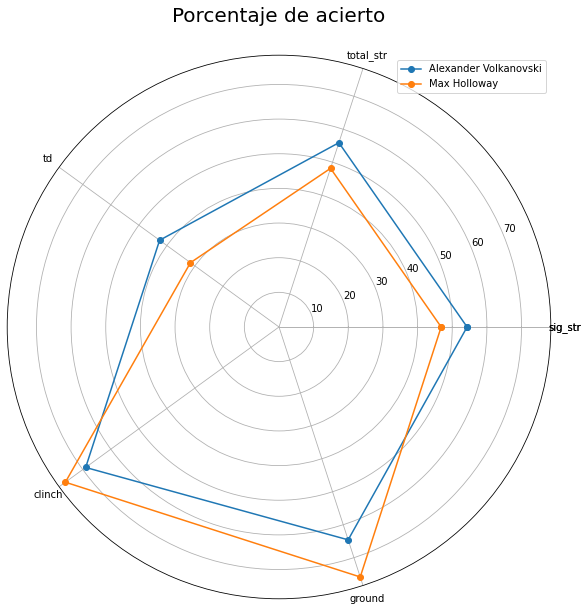

In [10]:
# Ahora utilizaremos una figura con forma de telaraña para ver cuáles son sus estadísticas principales de ataque.
gr.comparate(peleadores, base)

<p>Observando los resultados de la figura, podemos ver que volkanovski tendrá ventaja en una decisión, puesto que tiene un mayor porcentaje de exito a la hora de realizar takedowns, y también al ultilizar el striking y como ya se ha visto con anterioridad estos aspectos son tomados en cuenta a la hora de puntuar la pelea.</p>
<p>Otra posiblilidad es la que el combate acabe con una finalización pero eso se tendra que determinar más tarde teniendo en cuenta las defensas contra los ataques.</p>

<Figure size 432x288 with 0 Axes>

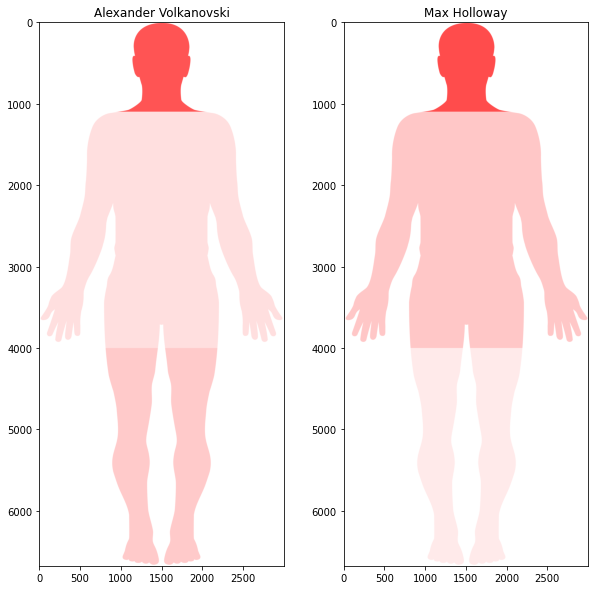

<Figure size 432x288 with 0 Axes>

In [5]:
gr.m_golpeo(peleadores, base)

<p>El lugar que más golpean ambos peleadores es la cabeza. Por parte de "Max Holloway" el segundo lugar mas golpeado es el cuerpo y por último las piernas, por el contario  "Alexander Volkanovski" golpea más a las piernas que al cuerpo.</p>
<p>En el boxeo si que sulen ser efectivos los golpes al cuerpo, pero en el caso de las MMA´s los golpes al cuerpo causan menos daños ya que el area de impacto es menor devido a el tamaño de los guantes que utilizan</p>

<AxesSubplot: >

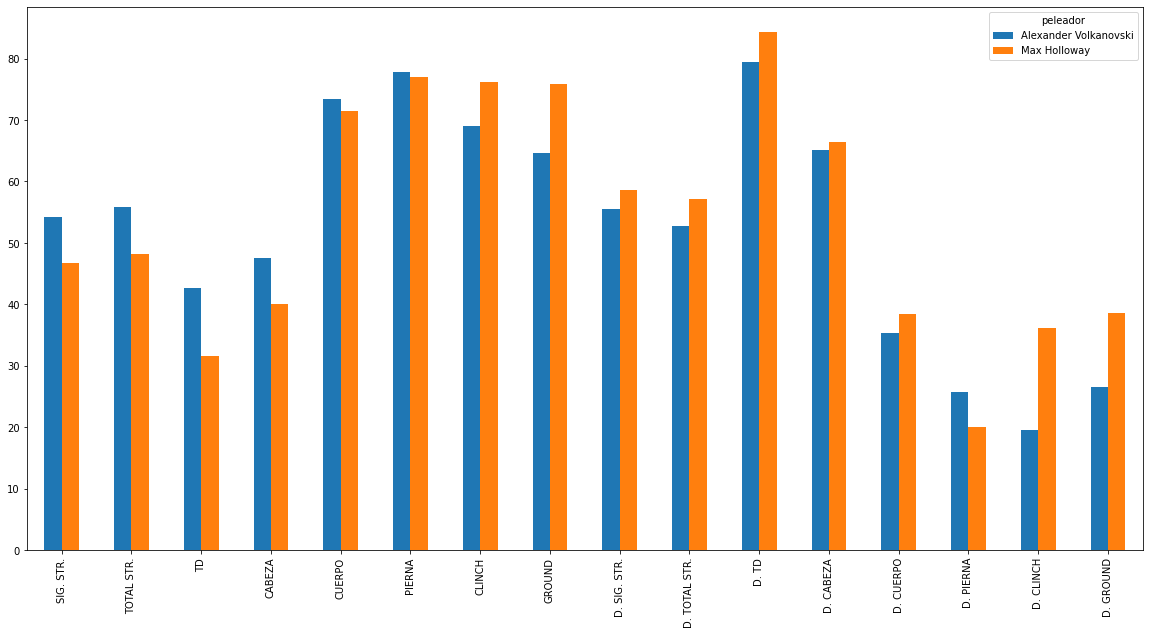

In [11]:
# Ahora haremos una gráfica en la que expondrán más ampliamente las estadísticas de ataque y defensa
gr.stats(peleadores, base)

<p>En esta gráfica se puede observar una clara pariedad en cuanto a la defensa de Holloway y el ataque de Volkanovski, lo que no indica que será una pelea que consumirá gran parte del tiempo de la pelea, pero con mayor dominio de Volkanovski.</p>
<p>Las <b>conclusiones</b> que saco es que es una pelea muy pareja, pero se va a decantar a favor de Volkanovski debido a los siguientes motivos: al ser más efectivas las artes marciales de suelo y como un excelente striker, tiene más probabilidad de dominar el combate. No obstante, las habilidades defensivas de Holloway le permiten contrarrestarlas en cierta medida, sobrellevando el combate hasta una posible decisión.</p>

In [ ]:
gr.por_conect(base)